In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
train_data = pd.read_csv('train.csv')

In [3]:
# Display first few rows of the dataset
print(train_data.head())

   sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [4]:
# Preprocessing: Handle missing values (if any)
data = train_data.fillna(train_data.mean())

C:\Users\MD AAMIR AHMED\AppData\Local\Temp\ipykernel_17372\2751522415.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = train_data.fillna(train_data.mean())


In [5]:
# Encoding categorical variables (Gender, Status, etc.)
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])  # Encode gender
data['ssc_b'] = le.fit_transform(data['ssc_b'])    # Encode SSC board
data['hsc_b'] = le.fit_transform(data['hsc_b'])    # Encode HSC board
data['hsc_s'] = le.fit_transform(data['hsc_s'])    # Encode HSC stream
data['degree_t'] = le.fit_transform(data['degree_t'])  # Encode degree type
data['specialisation'] = le.fit_transform(data['specialisation'])  # Encode MBA specialisation
data['status'] = le.fit_transform(data['status'])  # Encode placement status (target variable)

In [6]:
# For simplicity, we'll encode all object columns
categorical_columns = data.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col].astype(str))  # Convert all object types to string and then label encode

In [7]:
# Define features and target variable
X = data.drop(['sl_no', 'salary', 'status'], axis=1)  # Features (excluding salary, sl_no, and status)
y = data['status']  # Target variable (Placed/Not Placed)

In [8]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalize the features (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Initialize models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

In [11]:
# Train Logistic Regression
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

In [12]:
# Train Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [13]:
# Train Support Vector Machine
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [14]:
# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("-" * 50)

In [15]:
# Evaluate each model
evaluate_model("Logistic Regression", y_test, logreg_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("SVM", y_test, svm_pred)

Model: Logistic Regression
Accuracy: 0.855072463768116
Precision: 0.84
Recall: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        25
           1       0.84      0.95      0.89        44

    accuracy                           0.86        69
   macro avg       0.87      0.82      0.83        69
weighted avg       0.86      0.86      0.85        69

Confusion Matrix:
[[17  8]
 [ 2 42]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.8405797101449275
Precision: 0.8235294117647058
Recall: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.64      0.74        25
           1       0.82      0.95      0.88        44

    accuracy                           0.84        69
   macro avg       0.86      0.80      0.81        69
weighted avg       0.85      0.84      0.83        69

Confusi

In [16]:
# Model comparison using cross-validation
models = [('Logistic Regression', logreg), ('Random Forest', rf), ('SVM', svm)]
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Cross-validation Accuracy: {np.mean(scores):.4f}")

Logistic Regression - Cross-validation Accuracy: 0.9271
Random Forest - Cross-validation Accuracy: 0.9090
SVM - Cross-validation Accuracy: 0.9015


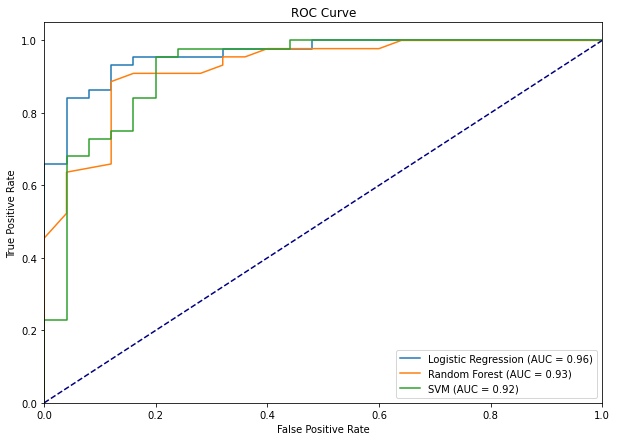

In [17]:
# Plot ROC curve for each model
plt.figure(figsize=(10, 7))
for model, name in zip([logreg, rf, svm], ["Logistic Regression", "Random Forest", "SVM"]):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Hyperparameter tuning for Random Forest (as an example)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [19]:
# Best parameters from GridSearch
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}


In [20]:
# Train the model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
best_rf_pred = best_rf.predict(X_test)

In [21]:
# Evaluate the tuned Random Forest model
evaluate_model("Tuned Random Forest", y_test, best_rf_pred)

Model: Tuned Random Forest
Accuracy: 0.855072463768116
Precision: 0.84
Recall: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        25
           1       0.84      0.95      0.89        44

    accuracy                           0.86        69
   macro avg       0.87      0.82      0.83        69
weighted avg       0.86      0.86      0.85        69

Confusion Matrix:
[[17  8]
 [ 2 42]]
--------------------------------------------------


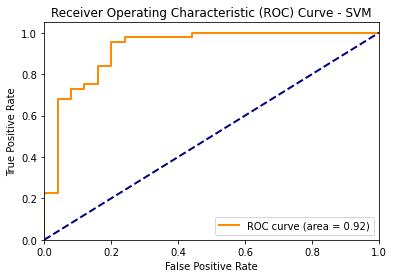

In [22]:
# Get the predicted probabilities for the positive class
y_score = svm.decision_function(X_test)  # use decision_function for SVM

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()